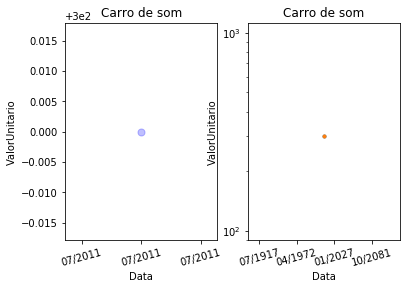

In [27]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

from csver import CSVer
from datetime import datetime

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

class Plotter:

    def plot_histogram(self, y_axis, x_label = '', y_label = '', title = ''):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        self.set_plot_style(x_label, y_label, title)
        
        result = plt.hist(y_axis, bins = 'fd', color = 'blue',
                          edgecolor = 'black', alpha = .75)
        return result
    
    def set_plot_style(self, x_label, y_label, title):
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
    
    def get_date_axis_from_array(self, dates):
        dates_date_time = [datetime.strptime(d, CSVer.DATE_INPUT_FORMAT) for d in dates]
        dates_axis = matplotlib.dates.date2num(dates_date_time)
        return dates_axis
        
    def plot_scatter_along_time(self, x_axis, y_axis, x_label = '',
                               y_label = '', title = '', subplot = 111,
                     figure = None):
        if figure is None:
            figure = plt.figure()
            
        hfmt = matplotlib.dates.DateFormatter(CSVer.DATE_GRAPH_FORMAT)
        ax = figure.add_subplot(subplot)
        ax.xaxis.set_major_formatter(hfmt)
        plt.setp(ax.get_xticklabels(), rotation=15)
        plt.scatter(x_axis, y_axis, s = 50, c = 'blue', alpha = 0.25)
        
        self.set_plot_style(x_label, y_label, title)

        ax = figure.add_subplot(1,2,2)
        ax.xaxis.set_major_formatter(hfmt)
        plt.setp(ax.get_xticklabels(), rotation=15)
        plt.semilogy(x_axis, y_axis, '.')
        self.set_plot_style(x_label, y_label, title)
        
    
    def plot_log_along_time(self, x_axis, y_axis, x_label = '', y_label = '',
                 title = '', subplot = 111, figure = None):
        if figure is None:
            figure = plt.figure()
        
        hfmt = matplotlib.dates.DateFormatter(CSVer.DATE_GRAPH_FORMAT)    
        ax = figure.add_subplot(1,2,2)
        ax.xaxis.set_major_formatter(hfmt)
        plt.setp(ax.get_xticklabels(), rotation=15)
        plt.semilogy(x_axis, y_axis, '.')
        self.set_plot_style(x_label, y_label, title)
    
    def plot_scatter_log_along_time(self, x_axis, y_axis, x_label = '',
                                    y_label = '', title = ''):
        figure = plt.figure()
        self.plot_scatter_along_time(x_axis, y_axis, x_label, y_label,
                                     title, subplot = 121,
                                     figure = figure)
        self.plot_log_along_time(x_axis, y_axis, x_label, y_label,
                                 title, subplot = 122,
                                 figure = figure)
        
    def show(self):
        plt.show()
        
approved = 'aprovado_small.csv'
csvs = [approved]

csver = CSVer(csvs)
item = csver.get_random_item('Item')
dt = csver.filter_column_by_value('Item', item)
x, y = csver.get_x_y('Data', 'ValorUnitarioAprovado', ('Item', item))

figure = plt.figure()
plotter = Plotter()
arr = plotter.get_date_axis_from_array(x)

plotter.plot_scatter_log_along_time(arr, y, 'Data', 'ValorUnitario',
                                    item)